In [3]:
!pip install mpl-scatter-density
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_scatter_density

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
df = pd.read_csv('combined.csv')
color = np.array(df['bp-rp'])
g_absolute = np.array(df['abs_G_mag'])
origin = np.array(df['origin_table'])

/usr/local/lib/python3.7/dist-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/usr/local/lib/python3.7/dist-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


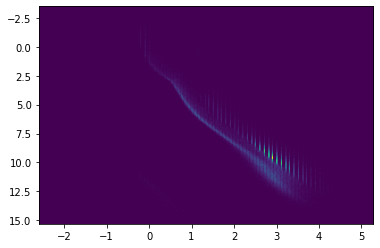

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')

density = ax.scatter_density(color, g_absolute)
ax.invert_yaxis()

plt.show()

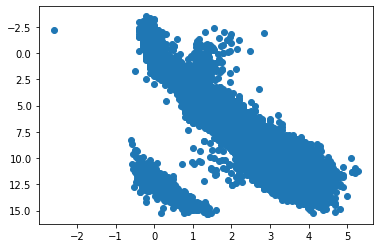

In [12]:
plt.scatter(color, g_absolute)
plt.gca().invert_yaxis()

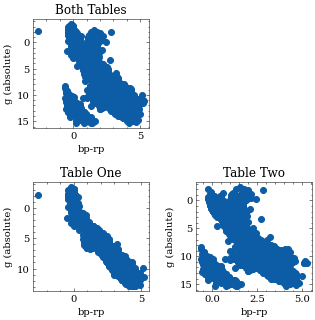

In [18]:
plt.style.use('https://raw.githubusercontent.com/thissop/MAXI-J1535/main/code/misc/stolen_science.mplstyle?token=GHSAT0AAAAAABP54PQO2X2VXMNS256IWOBOYRNCFBA')
fig, axs = plt.subplots(2,2, figsize=(5,5))

axs[0,0].scatter(color, g_absolute)

axs[0,1].axis('off')

mask = origin<=1
axs[1,0].scatter(color[mask], g_absolute[mask])

mask = origin>1
axs[1,1].scatter(color[mask], g_absolute[mask])


titles = ['Both Tables', 'Table One', 'Table Two']
for i, ax in enumerate([axs[0,0], axs[1,0], axs[1,1]]): 
    ax.invert_yaxis()
    ax.set(xlabel='bp-rp', ylabel='g (absolute)', title=titles[i])

plt.subplots_adjust(hspace=0.5, wspace=0.4)

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

In [22]:
combined = np.array([color, g_absolute]).T
combined

array([[ 3.5       , 10.90068027],
       [ 3.        ,  9.4762313 ],
       [ 2.4       ,  6.80003471],
       ...,
       [ 2.5       , 10.15498337],
       [ 2.91      , 11.79215705],
       [ 2.62      ,  9.63371318]])

In [24]:
db = DBSCAN(eps=0.3, min_samples=10).fit(combined)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

2

[Text(0, 0.5, 'g (absolute)'),
 Text(0.5, 0, 'bp-rp'),
 Text(0.5, 1.0, 'DBSCAN Demo')]

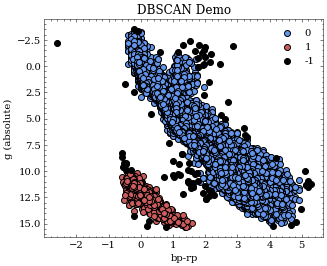

In [32]:
plt.style.use('https://raw.githubusercontent.com/thissop/MAXI-J1535/main/code/misc/stolen_science.mplstyle?token=GHSAT0AAAAAABP54PQO2X2VXMNS256IWOBOYRNCFBA')

fig, ax = plt.subplots(figsize=(5,4))

colors = ['cornflowerblue', 'indianred', 'black']

for i, label in enumerate(list(set(labels))): 
    mask = np.where(labels==label)[0]
    ax.scatter(color[mask], g_absolute[mask], color=colors[i], label=str(label), edgecolor='black')

ax.legend()
ax.invert_yaxis()
ax.set(xlabel='bp-rp', ylabel='g (absolute)', title='DBSCAN Demo')



In [36]:
from sklearn.cluster import KMeans

[Text(0, 0.5, 'g (absolute)'),
 Text(0.5, 0, 'bp-rp'),
 Text(0.5, 1.0, 'K-Means Demo')]

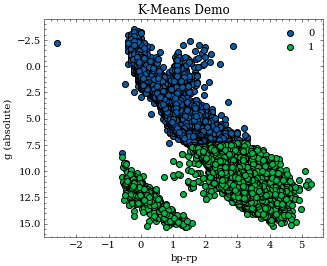

In [38]:
kmeans = KMeans(n_clusters=2).fit(combined)
labels = kmeans.labels_

plt.style.use('https://raw.githubusercontent.com/thissop/MAXI-J1535/main/code/misc/stolen_science.mplstyle?token=GHSAT0AAAAAABP54PQO2X2VXMNS256IWOBOYRNCFBA')

fig, ax = plt.subplots(figsize=(5,4))

for i, label in enumerate(list(set(labels))): 
    mask = np.where(labels==label)[0]
    ax.scatter(color[mask], g_absolute[mask], label=str(label), edgecolor='black')

ax.legend()
ax.invert_yaxis()
ax.set(xlabel='bp-rp', ylabel='g (absolute)', title='K-Means Demo')